In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
train = pd.read_csv("wholesale_price.csv")
df = train

In [160]:
df

,crop,_2004_05,_2005_06,_2006_07,_2007_08,_2008_09,_2009_10,_2010_11,_2011_12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,Sugarcane,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


In [4]:
df.shape

(13, 9)

In [5]:
df.describe()

,_2004_05,_2005_06,_2006_07,_2007_08,_2008_09,_2009_10,_2010_11,_2011_12
count,12.0,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,100.0,99.75000,102.000000,104.750000,106.416667,114.916667,121.916667,120.750000
std,0.0,6.64865,12.634728,10.963783,11.261022,15.900019,11.405408,12.800036
min,100.0,86.00000,85.000000,87.000000,80.000000,81.000000,99.000000,102.000000
25%,100.0,96.75000,96.250000,97.750000,101.250000,106.250000,116.250000,109.500000
50%,100.0,100.00000,100.000000,102.000000,107.500000,115.500000,122.500000,120.500000
75%,100.0,103.25000,104.750000,115.000000,113.000000,123.250000,129.250000,130.750000
max,100.0,109.00000,134.000000,124.000000,124.000000,146.000000,138.000000,140.000000


In [182]:
X = [0 , 1 , 2 , 3 , 4 , 5 , 6 , 7]
y = df.loc[ df.crop == "Vegetables" , "_2004_05" : "_2011_12" ].as_matrix()

In [183]:
X = np.array(X)

In [184]:
y

array([], shape=(0, 8), dtype=float64)

In [168]:
y = y.reshape(8 , 1)

In [169]:
X

array([0, 1, 2, 3, 4, 5, 6, 7])

In [170]:
X = X.reshape(8 , 1)

In [171]:
X.shape

(8, 1)

In [172]:
y.shape

(8, 1)

In [173]:
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

reg = svm.SVR(C=0.5 , epsilon=0.01)
reg.fit(X , y )  

SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [174]:
X_test = [8 , 9 , 10 , 11 , 12 , 13 , 14 , 15]
X_test = np.array(X_test)

In [175]:
pred = reg.predict(X_test.reshape(8 , 1))

In [176]:
pred

array([ 105.1931593 ,  105.00921958,  105.00006176,  105.00000006,
        105.        ,  105.        ,  105.        ,  105.        ])

In [177]:
Years = ["2004-05" , "2005-06" ,"2006-07", "2007-08" , "2008-09" , "2009-10" , "2010-11" , "2011-12" , "2012-13" , "2013-14" , "2014-15" , "2015-16" , "2016-17" , "2017-18" , "2018-19" , "2019-20" ]

In [178]:
def calc_pred(Crop):
    X = [0 , 1 , 2 , 3 , 4 , 5 , 6 , 7]
    y = df.loc[ df.crop == Crop , "_2004_05" : "_2011_12" ].as_matrix()
    X = np.array(X)
    y = y.reshape(8 , 1)
    X = X.reshape(8 , 1)
    reg = svm.SVR(C=0.5 , epsilon=0.01)
    reg.fit(X , y ) 
    X_test = [8 , 9 , 10 , 11 , 12 , 13 , 14 , 15]
    X_test = np.array(X_test)
    pred = reg.predict(X_test.reshape(8 , 1))
    pred = pred.reshape(8 , 1)
    temp = y.reshape(8 , 1)
    rohit = []
    for i in temp:
        rohit.append(i)
    for i in pred:
        rohit.append(i)
    rohit = np.array(rohit)
    rohit = rohit.reshape(16,)
    Years = ["2004-05" , "2005-06" ,"2006-07", "2007-08" , "2008-09" , "2009-10" , "2010-11" , "2011-12" , "2012-13" , "2013-14" , "2014-15" , "2015-16" , "2016-17" , "2017-18" , "2018-19" , "2019-20" ]
    Years = np.array(Years)
    d = { "Years" : Years , "Prediction" : rohit }
    final = pd.DataFrame(d)
    fig, axes = plt.subplots(1,1)
    fig.set_size_inches(10, 5)
    sns.pointplot(data=final ,x = "Years" ,y = "Prediction", orient="v" )
    fig.savefig("5.png")
    final.to_csv( 'price_prediction.csv' , index = False )
    print(pred)

[[ 105.1931593 ]
 [ 105.00921958]
 [ 105.00006176]
 [ 105.00000006]
 [ 105.        ]
 [ 105.        ]
 [ 105.        ]
 [ 105.        ]]


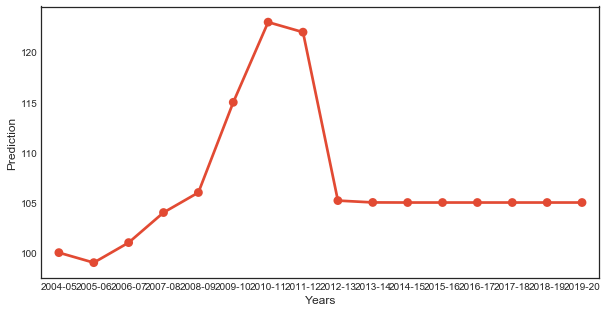

In [185]:
calc_pred("All Agriculture")